In [28]:
import librosa
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import Audio

In [29]:
import os
import csv

# Path to the main dataset folder
base_path = r'D:\BeakyBotX\Cleaned_Dataset\train'

# Output CSV file
csv_file = 'bird_audio_dataset.csv'

# Open CSV file for writing
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['file_name', 'fold', 'class'])  # CSV headers

    # Traverse each bird folder
    for bird_name in os.listdir(base_path):
        bird_folder = os.path.join(base_path, bird_name)

        if os.path.isdir(bird_folder):
            for audio_file in os.listdir(bird_folder):
                audio_path = os.path.join(bird_folder, audio_file)

                if os.path.isfile(audio_path):
                    writer.writerow([audio_file, bird_name, bird_name])


In [30]:
audiofiles = pd.read_csv('bird_audio_dataset.csv')

In [31]:
audiofiles.head()

file_name              fold             class
0     0.wav  Ashy Prinia bird  Ashy Prinia bird
1     1.wav  Ashy Prinia bird  Ashy Prinia bird
2    10.wav  Ashy Prinia bird  Ashy Prinia bird
3    11.wav  Ashy Prinia bird  Ashy Prinia bird
4    13.wav  Ashy Prinia bird  Ashy Prinia bird

In [32]:
audiofiles['class'].value_counts()

class
Rufous Treepie bird                   71
Red-Wattled Lapwing bird              71
Common Tailorbird bird                70
Cinereous Tit bird                    64
House Crow bird                       63
                                      ..
Himalayan Flameback bird               4
White-Bellied Blue Flycatcher bird     4
Siberian Rubythroat bird               4
Wire-Tailed Swallow bird               4
Asian Openbill bird                    2
Name: count, Length: 130, dtype: int64

In [33]:
idx = list(np.where(audiofiles['class']=='House Crow bird')[0])[0]

arr = np.array(audiofiles['file_name'])
fold = np.array(audiofiles['fold'])
cla = np.array(audiofiles['class'])

# Fixed: Proper string concatenation

path = os.path.join(r'D:\BeakyBotX\Cleaned_Dataset\train', fold[idx], arr[idx])
original_audio, sample_rate = librosa.load(path)
Audio(data=original_audio, rate=sample_rate)

Text(0.5, 23.52222222222222, 'Time [secs]')

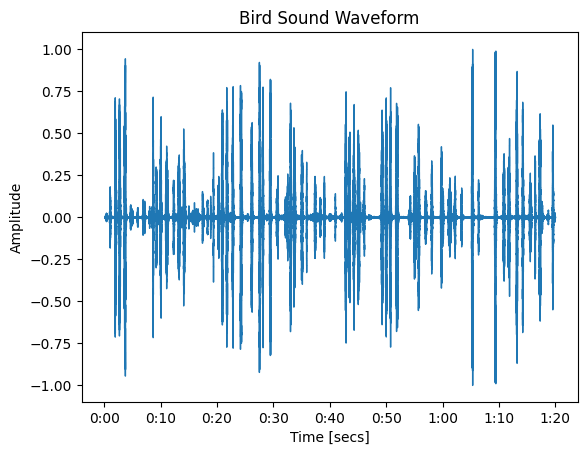

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, sharex=True)
librosa.display.waveshow(original_audio, sr=sample_rate, ax=ax)
ax.set(title='Bird Sound Waveform')
ax.set_ylabel('Amplitude')
ax.set_xlabel('Time [secs]')

In [35]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(original_audio)), ref = np.max)
print(D.shape)
print(D[0])

(1025, 3444)
[-80. -80. -80. ... -80. -80. -80.]


Text(0, 0.5, 'Decibel')

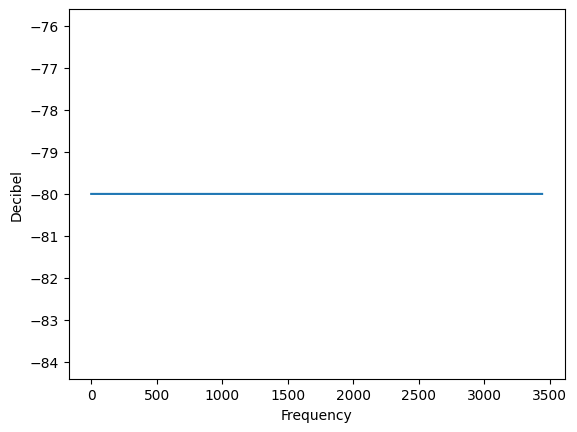

In [36]:
plt.plot(D[1000])
plt.xlabel('Frequency')
plt.ylabel('Decibel')

Text(0.5, 1.0, 'House Crow bird')

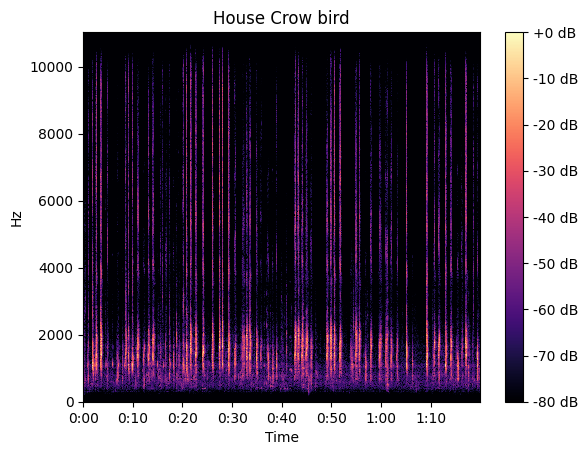

In [37]:
#spectrogram
librosa.display.specshow(D,y_axis='linear',x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(cla[idx])

In [38]:
feature = []
label = []

arr = np.array(audiofiles['file_name'])        # Changed from 'slice_file_name'
fold = np.array(audiofiles['fold'])
cla = np.array(audiofiles['class'])

base_path = r'D:\BeakyBotX\Cleaned_Dataset\train'

for i in range(len(audiofiles)):
    # Proper path using os.path.join
    filepath = os.path.join(base_path, str(fold[i]), arr[i])
    
    # Load and extract features
    X, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
    mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    
    feature.append(mels)
    label.append(cla[i])

KeyboardInterrupt: 

In [ ]:
feature

[array([9.9142244e-07, 2.2972385e-08, 2.0013390e-07, 7.3394182e-07,
        1.9803908e-06, 4.5206898e-06, 7.6946289e-06, 2.7168751e-05,
        6.7397661e-05, 2.2206927e-04, 3.7896997e-04, 5.7110429e-04,
        5.1753659e-04, 4.3783837e-04, 5.3019903e-04, 7.6176232e-04,
        1.0201613e-03, 1.9428616e-03, 2.5930083e-03, 6.4188633e-03,
        7.7201216e-03, 6.3266857e-03, 3.1763129e-03, 2.6061840e-03,
        2.4316611e-03, 1.9010268e-03, 2.0434405e-03, 1.8437572e-03,
        1.1389108e-03, 1.5464436e-03, 1.8013595e-03, 2.6458662e-03,
        1.5026747e-03, 8.5098064e-04, 7.6682214e-04, 9.8997285e-04,
        9.6723705e-04, 8.7169191e-04, 3.7564995e-04, 6.2432565e-04,
        7.0264522e-04, 8.1202236e-04, 1.2990508e-03, 1.3535273e-03,
        1.1128380e-03, 7.6839497e-04, 5.7055126e-04, 4.9339532e-04,
        4.4699237e-04, 4.9862103e-04, 5.6059548e-04, 6.4633199e-04,
        8.5933768e-04, 1.1359018e-03, 1.0302662e-03, 1.0265569e-03,
        1.1022747e-03, 1.3271980e-03, 1.5043336e

In [ ]:
feature[0].shape

(128,)

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(label)

# Shift values to start from 1 instead of 0
label = label + 1

# Now `label` is your final array
# (Optional) If you want to see the mapping:
label_mapping = {class_: i+1 for i, class_ in enumerate(le.classes_)}

In [41]:
label[0]

np.int64(1)

In [42]:
temp = np.array([feature,label],dtype='object')
data = temp.transpose()

In [43]:
X_= data[:,0]
Y = data[:,1]
print(X_.shape, Y.shape)

(142,) (142,)


In [44]:
X = np.empty([142,128])
for i in range(142):
    X[i] = (X_[i])

In [45]:
Y = to_categorical(Y)

In [46]:
print(X.shape)
print(Y.shape)

(142, 128)
(142, 9)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=123)
print("Number of Train Samples: ", X_train.shape[0])
print("Number of Test Samples: ", X_test.shape[0])

Number of Train Samples:  113
Number of Test Samples:  29


In [50]:
#Neural Network with 6 Dense Layers
model = Sequential(
    [
        Dense(1000,activation='relu',input_shape=(128,)),
        Dense(750,activation='relu'),
        Dense(500,activation='relu'),
        Dense(250,activation='relu'),
        Dense(100,activation='relu'),
        Dense(50,activation='relu'),
        Dense(9,activation='softmax'),
    ]
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 1000)           │       129,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 9)              │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411,109 (5.38 MB)

 Trainable params: 1,411,109 (5.38 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=90,batch_size=50,validation_data=[X_test,y_test])

Epoch 1/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.2202 - loss: 2.0667 - val_accuracy: 0.6207 - val_loss: 1.4763
Epoch 2/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5776 - loss: 1.3153 - val_accuracy: 0.5517 - val_loss: 1.3552
Epoch 3/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6059 - loss: 1.0302 - val_accuracy: 0.6552 - val_loss: 1.0824
Epoch 4/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6367 - loss: 0.9642 - val_accuracy: 0.6207 - val_loss: 1.1994
Epoch 5/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6757 - loss: 0.9385 - val_accuracy: 0.5862 - val_loss: 1.1803
Epoch 6/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6940 - loss: 0.8172 - val_accuracy: 0.7241 - val_loss: 1.0446
Epoch 7/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7517 - loss: 0.7254 - val_accuracy: 0.6897 - val_loss: 0.9026
Epoch 8/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7825 - loss: 0.6450 - val_accuracy: 0.6552 - val_loss: 1.1891